## Project 1: Health Care

### Description:
Cardiovascular diseases are the leading cause of death globally. It is therefore necessary to identify the causes and develop a system to predict heart attacks in an effective manner. The data below has the information about the factors that might have an impact on cardiovascular health.

Dataset description:

|Variable	     |Description                    |
|----------------|:------------------------------|
|Age	         |Age in years                   |
|Sex	         |1 = male; 0 = female           |
|cp 	         |Chest pain type                |
|trestbps	     |Resting blood pressure (in mm Hg on admission to the hospital)|
|chol	         |Serum cholesterol in mg/dl     |
|fbs	         |Fasting blood sugar > 120 mg/dl (1 = true; 0 = false)|
|restecg	     |Resting electrocardiographic results|
|thalach	     |Maximum heart rate achieved     |
|exang	         |Exercise induced angina (1 = yes; 0 = no)|
|oldpeak	     |ST depression induced by exercise relative to rest|
|slope	         |Slope of the peak exercise ST segment|
|ca	             |Number of major vessels (0-3) colored by fluoroscopy|
|thal	         |3 = normal; 6 = fixed defect; 7 = reversible defect|
|Target	         |1 or 0                          |


Note:

Download CEP 1_ Dataset.xlsx using the link given in the Healthcare project problem statement


#### Task to be performed:

1.	Preliminary analysis:

> a.	Perform preliminary data inspection and report the findings on the structure of the data, missing values, duplicates, etc.

> b.	Based on these findings, remove duplicates (if any) and treat missing values using an appropriate strategy

2.	Prepare a report about the data explaining the distribution of the disease and the related factors using the steps listed below:

> a.	Get a preliminary statistical summary of the data and explore the measures of central tendencies and spread of the data

> b.	Identify the data variables which are categorical and describe and explore these variables using the appropriate tools, such as count plot 

> c.	Study the occurrence of CVD across the Age category

> d.	Study the composition of all patients with respect to the Sex category

> e.	Study if one can detect heart attacks based on anomalies in the resting blood pressure (trestbps) of a patient

> f.	Describe the relationship between cholesterol levels and a target variable

> g.	State what relationship exists between peak exercising and the occurrence of a heart attack

> h.	Check if thalassemia is a major cause of CVD

> i.	List how the other factors determine the occurrence of CVD

> j.	Use a pair plot to understand the relationship between all the given variables

3.	Build a baseline model to predict the risk of a heart attack using a logistic regression and random forest and explore the results while using correlation analysis and logistic regression (leveraging standard error and p-values from statsmodels) for feature selection


In [1]:
## Importing required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings('ignore')

### Reading the dataset

In [2]:
healthcare=pd.read_excel('1645792390_cep1_dataset.xlsx')

In [3]:
healthcare.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Preliminary Analysis
> a. Perform preliminary data inspection and report the findings on the structure of the data, missing values, duplicates, etc.

In [4]:
healthcare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
healthcare.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

* *No Missing Values in Dataset*

In [6]:
healthcare[healthcare.duplicated()]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


- *One Duplicate observation is present* 

> b.	Based on these findings, remove duplicates (if any) and treat missing values using an appropriate strategy

In [7]:
# Removing the duplicates from the dataset
healthcare.drop_duplicates(inplace=True)

In [8]:
healthcare.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    int64  
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        302 non-null    int64  
 12  thal      302 non-null    int64  
 13  target    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.4 KB


### Prepare a report about the data explaining the distribution of the disease and the related factors using the steps listed below:

> a. Get a preliminary statistical summary of the data and explore the measures of central tendencies and spread of the data

In [9]:
# Statistical Summary of the data
healthcare.describe().T

,count,mean,std,min,25%,50%,75%,max
age,302.0,54.420530,9.047970,29.0,48.00,55.5,61.00,77.0
sex,302.0,0.682119,0.466426,0.0,0.00,1.0,1.00,1.0
cp,302.0,0.963576,1.032044,0.0,0.00,1.0,2.00,3.0
trestbps,302.0,131.602649,17.563394,94.0,120.00,130.0,140.00,200.0
chol,302.0,246.500000,51.753489,126.0,211.00,240.5,274.75,564.0
fbs,302.0,0.149007,0.356686,0.0,0.00,0.0,0.00,1.0
restecg,302.0,0.526490,0.526027,0.0,0.00,1.0,1.00,2.0
thalach,302.0,149.569536,22.903527,71.0,133.25,152.5,166.00,202.0
exang,302.0,0.327815,0.470196,0.0,0.00,0.0,1.00,1.0
oldpeak,302.0,1.043046,1.161452,0.0,0.00,0.8,1.60,6.2


> b. Identify the data variables which are categorical and describe and explore these variables using the appropriate tools, such as count plot

In [10]:
# Selecting the categorical data
healthcare_category=healthcare[['sex','cp','fbs','restecg','exang','slope','ca','thal','target']]
healthcare_category.describe()

,sex,cp,fbs,restecg,exang,slope,ca,thal,target
count,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,0.682119,0.963576,0.149007,0.526490,0.327815,1.397351,0.718543,2.314570,0.543046
std,0.466426,1.032044,0.356686,0.526027,0.470196,0.616274,1.006748,0.613026,0.498970
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2.000000,1.000000
75%,1.000000,2.000000,0.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000
max,1.000000,3.000000,1.000000,2.000000,1.000000,2.000000,4.000000,3.000000,1.000000


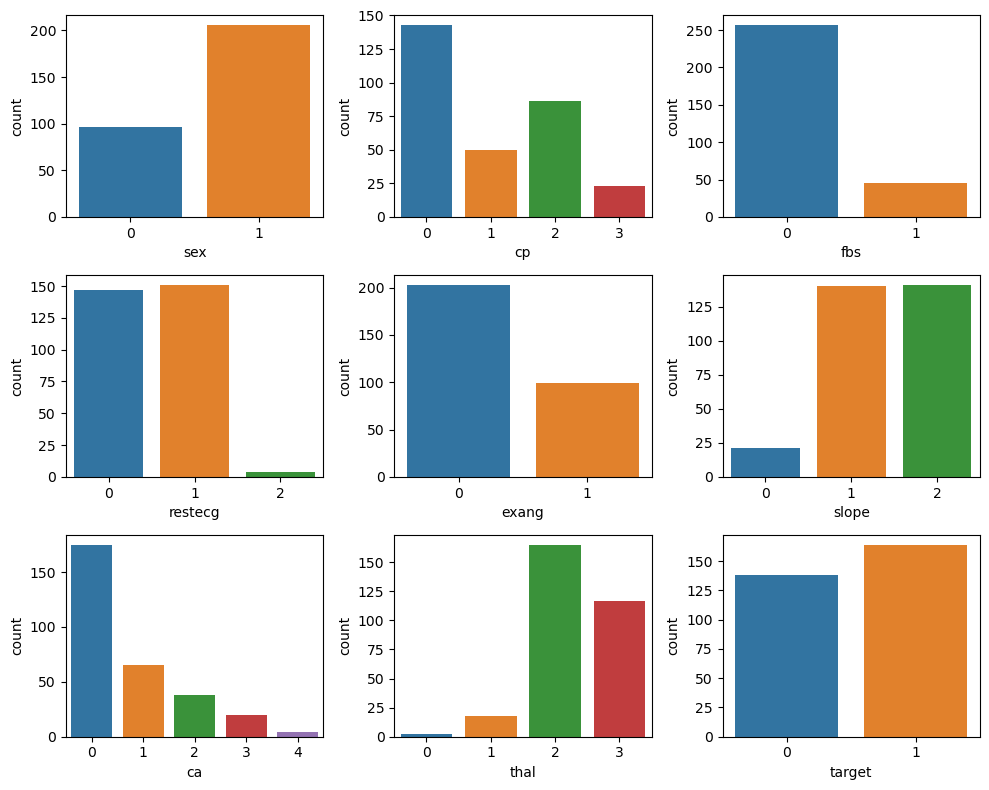

In [11]:
# Exploring the variables using count plot
plt.figure(figsize=(10,8))
for i in range(0,9):
    plt.subplot(3,3,i+1)
    sns.countplot(healthcare_category.iloc[:,i])
    i=i+1
    plt.tight_layout();

> c.	Study the occurrence of CVD across the Age category

In [12]:
# Agewise distribution of patients : target column 1 indicates diseased and column 0 indicates non diseased
healthcare.pivot_table(index=['age'],values=['sex'],columns='target',aggfunc='count')

sex      
target     0     1
age               
29       NaN   1.0
34       NaN   2.0
35       2.0   2.0
37       NaN   2.0
38       1.0   1.0
39       1.0   3.0
40       2.0   1.0
41       1.0   9.0
42       1.0   7.0
43       3.0   5.0
44       3.0   8.0
45       2.0   6.0
46       3.0   4.0
47       2.0   3.0
48       3.0   4.0
49       2.0   3.0
50       3.0   4.0
51       3.0   9.0
52       4.0   9.0
53       2.0   6.0
54       6.0  10.0
55       5.0   3.0
56       6.0   5.0
57      10.0   7.0
58      12.0   7.0
59       9.0   5.0
60       8.0   3.0
61       7.0   1.0
62       7.0   4.0
63       6.0   3.0
64       4.0   6.0
65       4.0   4.0
66       3.0   4.0
67       6.0   3.0
68       2.0   2.0
69       1.0   2.0
70       3.0   1.0
71       NaN   3.0
74       NaN   1.0
76       NaN   1.0
77       1.0   NaN

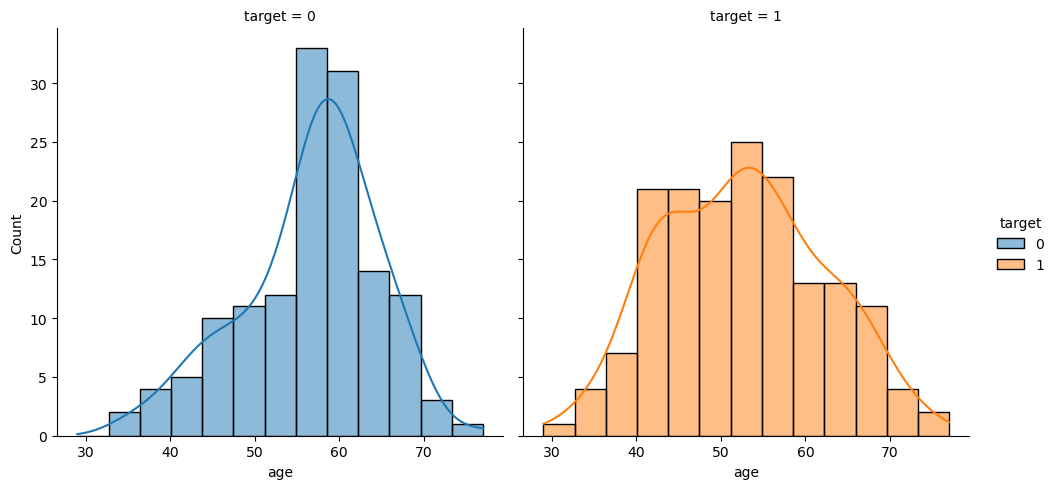

In [13]:
# Age wise data distribution plot, target=1 for diseased and target=0 for non diseased 
sns.displot(healthcare,x='age',col='target',hue='target',kde=True);

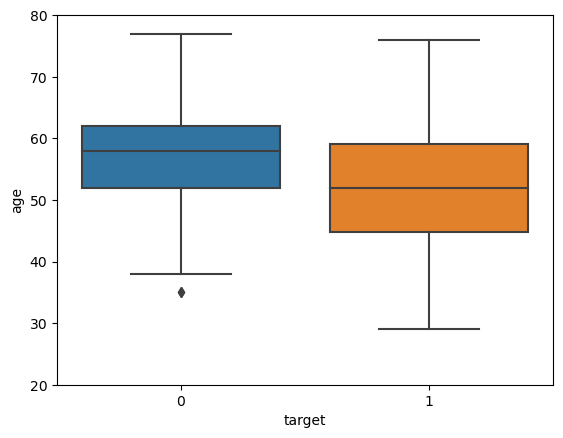

In [14]:
# Age wise data distribution showed using boxplot, target=1 for diseased and target=0 for non diseased 
sns.boxplot(x=healthcare['target'],y=healthcare['age'])
plt.ylim(20,80);

> d.	Study the composition of all patients with respect to the Sex category

In [15]:
# Composition of all patients with respect to sex (1=male,0=female) and diseased (target=1) and non diseased (target=0)
CVD_by_sex=pd.DataFrame({"Count":healthcare.groupby('target')['sex'].value_counts()})
CVD_by_sex

Count
target sex       
0      1      114
       0       24
1      1       92
       0       72

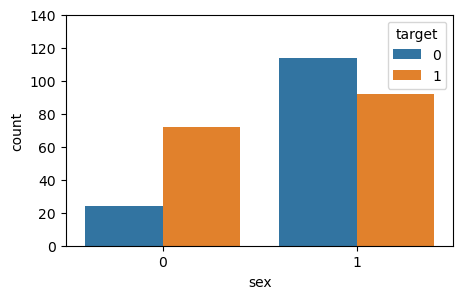

In [16]:
# plot shows male and female distribution with respect to diseased and nondiseased

plt.figure(figsize=(5,3))
sns.countplot(data=healthcare,x='sex',hue='target')
plt.ylim(0,140);

> e.	Study if one can detect heart attacks based on anomalies in the resting blood pressure (trestbps) of a patient

In [17]:
# Statistical summary of the patients blood pressure
healthcare.groupby('target')['trestbps'].describe()

,count,mean,std,min,25%,50%,75%,max
target,,,,,,,,
0,138.0,134.398551,18.729944,100.0,120.0,130.0,144.75,200.0
1,164.0,129.250000,16.204739,94.0,120.0,130.0,140.00,180.0


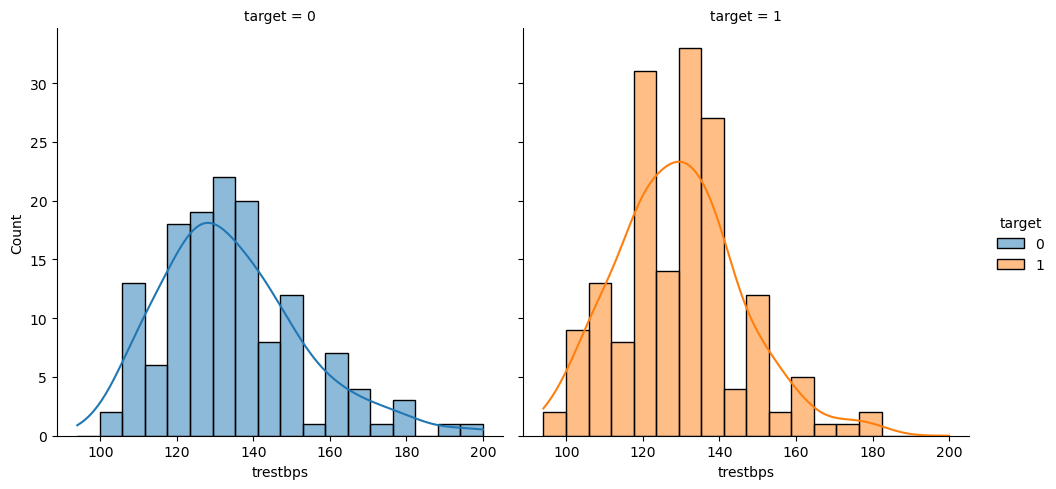

In [18]:
# Resting Blood pressure of the patients distribution plot for diseased (target=1) and nondiseased patients (target=0)
sns.displot(healthcare,x='trestbps',col='target',hue='target',kde=True);

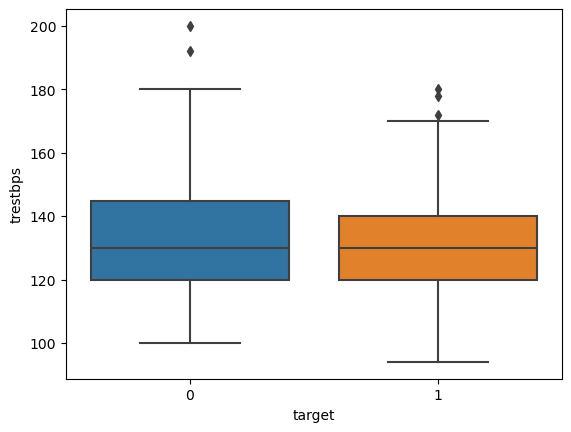

In [19]:
# Representation of the blood pressure distribution using boxplot  for diseased (target=1)and nondiseased patients (target=0)
sns.boxplot(x=healthcare['target'],y=healthcare['trestbps']);

> f.	Describe the relationship between cholesterol levels and a target variable

In [20]:
# Statistical summary of cholestrol level for diseased (target=1) and non diseased patients (target=0)
healthcare.groupby('target')['chol'].describe()

,count,mean,std,min,25%,50%,75%,max
target,,,,,,,,
0,138.0,251.086957,49.454614,131.0,217.25,249.0,283.00,409.0
1,164.0,242.640244,53.456580,126.0,208.75,234.5,267.25,564.0


In [21]:
# Correlation between cholesterol levels and a target variable
healthcare[['target','chol']].corr()

,target,chol
target,1.000000,-0.081437
chol,-0.081437,1.000000


*Cholesterol variable is negatively correlated with the target variable*

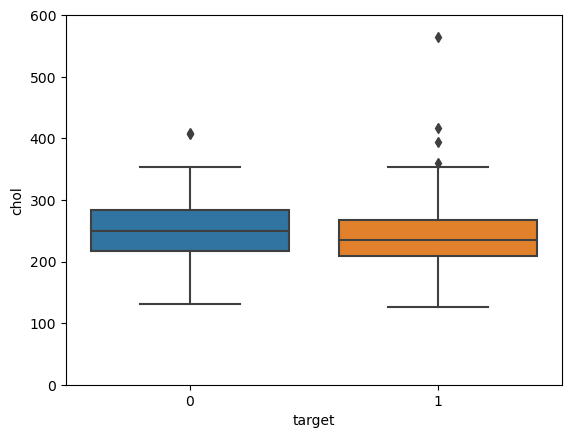

In [22]:
# Distribution of cholestrol level for diseased (target=1) and non diseased patients (target=0)
sns.boxplot(x=healthcare['target'],y=healthcare['chol'])
plt.ylim(0,600);

> g.	State what relationship exists between peak exercising and the occurrence of a heart attack


In [23]:
# Statistical summary of exercise parameters( exang-Exercise induced anigna,
# Old peak -ST depression induced by exercise relative to rest,Slope-slope of Peak exercise ST Segment)
#with respect to target variable
healthcare.groupby('target')[['exang','oldpeak','slope']].describe().T

target                  0           1
exang   count  138.000000  164.000000
        mean     0.550725    0.140244
        std      0.499232    0.348303
        min      0.000000    0.000000
        25%      0.000000    0.000000
        50%      1.000000    0.000000
        75%      1.000000    0.000000
        max      1.000000    1.000000
oldpeak count  138.000000  164.000000
        mean     1.585507    0.586585
        std      1.300340    0.781734
        min      0.000000    0.000000
        25%      0.600000    0.000000
        50%      1.400000    0.200000
        75%      2.500000    1.025000
        max      6.200000    4.200000
slope   count  138.000000  164.000000
        mean     1.166667    1.591463
        std      0.561324    0.594598
        min      0.000000    0.000000
        25%      1.000000    1.000000
        50%      1.000000    2.000000
        75%      1.750000    2.000000
        max      2.000000    2.000000

<AxesSubplot:>

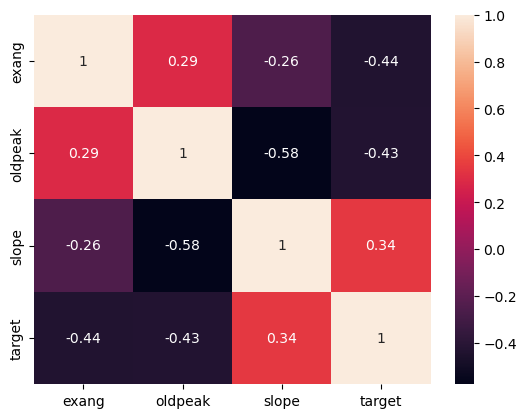

In [24]:
# Correlation of exercise parameters with respect to target variable
exe_corr=healthcare[['exang','oldpeak','slope','target']].corr()
sns.heatmap(exe_corr,annot=True)

*Slope (slope of Peak exercise ST Segment) is positively correlated to target variable*

*Old peak (ST depression induced by exercise relative to rest) and exang (Exercise induced anigna) variables are negatively correlated to target variable*

> h. Check if thalassemia is a major cause of CVD

In [25]:
# Distribution of diseased(target =1)and non diseased (target=0) patients across thalassemia categories
healthcare.pivot_table(index='thal',values='age',columns='target',aggfunc='count')

target,0,1
thal,,
0,1,1
1,12,6
2,36,129
3,89,28


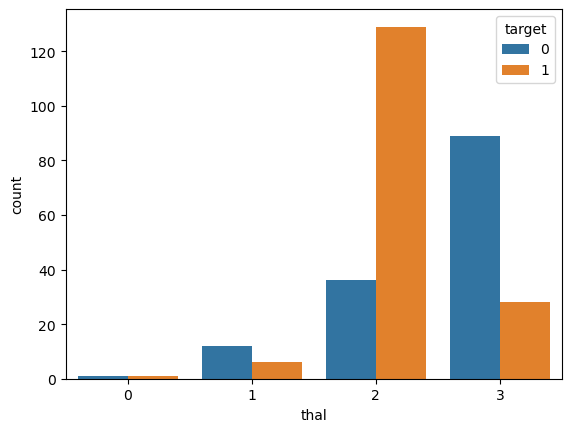

In [26]:
# Distribution of diseased(target =1)and non diseased (target=0) patients across thalassemia categories
sns.countplot(healthcare['thal'],hue=healthcare['target']);

 *Diseased patients are more in thalassemia category 2 (fixed_defect)*

> i. List how the other factors determine the occurrence of CVD

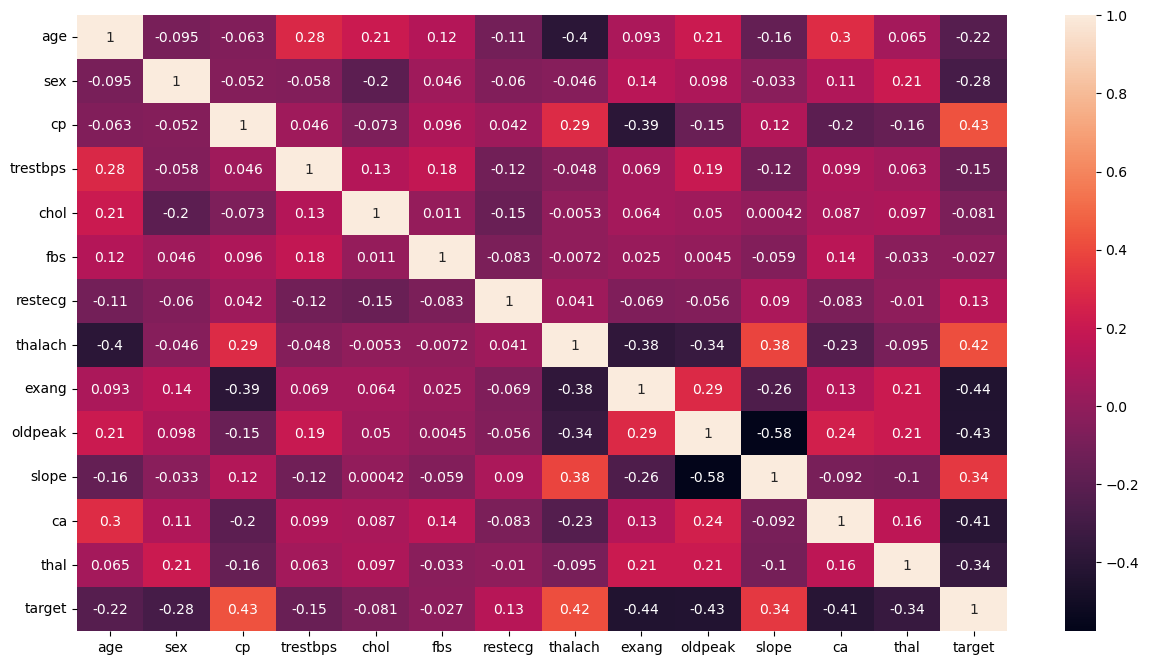

In [27]:
# Correlation of all the variables are represented using heatmap
plt.figure(figsize=(15,8))
sns.heatmap(healthcare.corr(),annot=True);

|Variable Name | Correlation with Target Variable|
|--------------|---------------------------------|
|Age           | Negatively corrleated           |
|Sex           | Negatively correlated           |
|cp(chest pain type)| Positively correlated      |
|trestbps(Resting blood pressure)|Negatively corrleated |
|chol (Serum cholestrol)|Negatively corrleated   |
|fbs (Fasting blood sugar)|Negatively corrleated |
|restecg (Resting electrocardiographic results)|Positively correlated |
|thalach (Maximum heart rate achieved)|Positively correlated |
|exang (Exercise induced angina)|Negatively corrleated |
|oldpeak (ST depression induced by exercise relative to rest)|Negatively corrleated |
|slope (Slope of the peak exercise ST segment)|Positively correlated |
|ca (Number of major vessels)|Negatively corrleated |
|thal (thalassemia) | Negatively corrleated |


 > Use a pair plot to understand the relationship between all the given variables

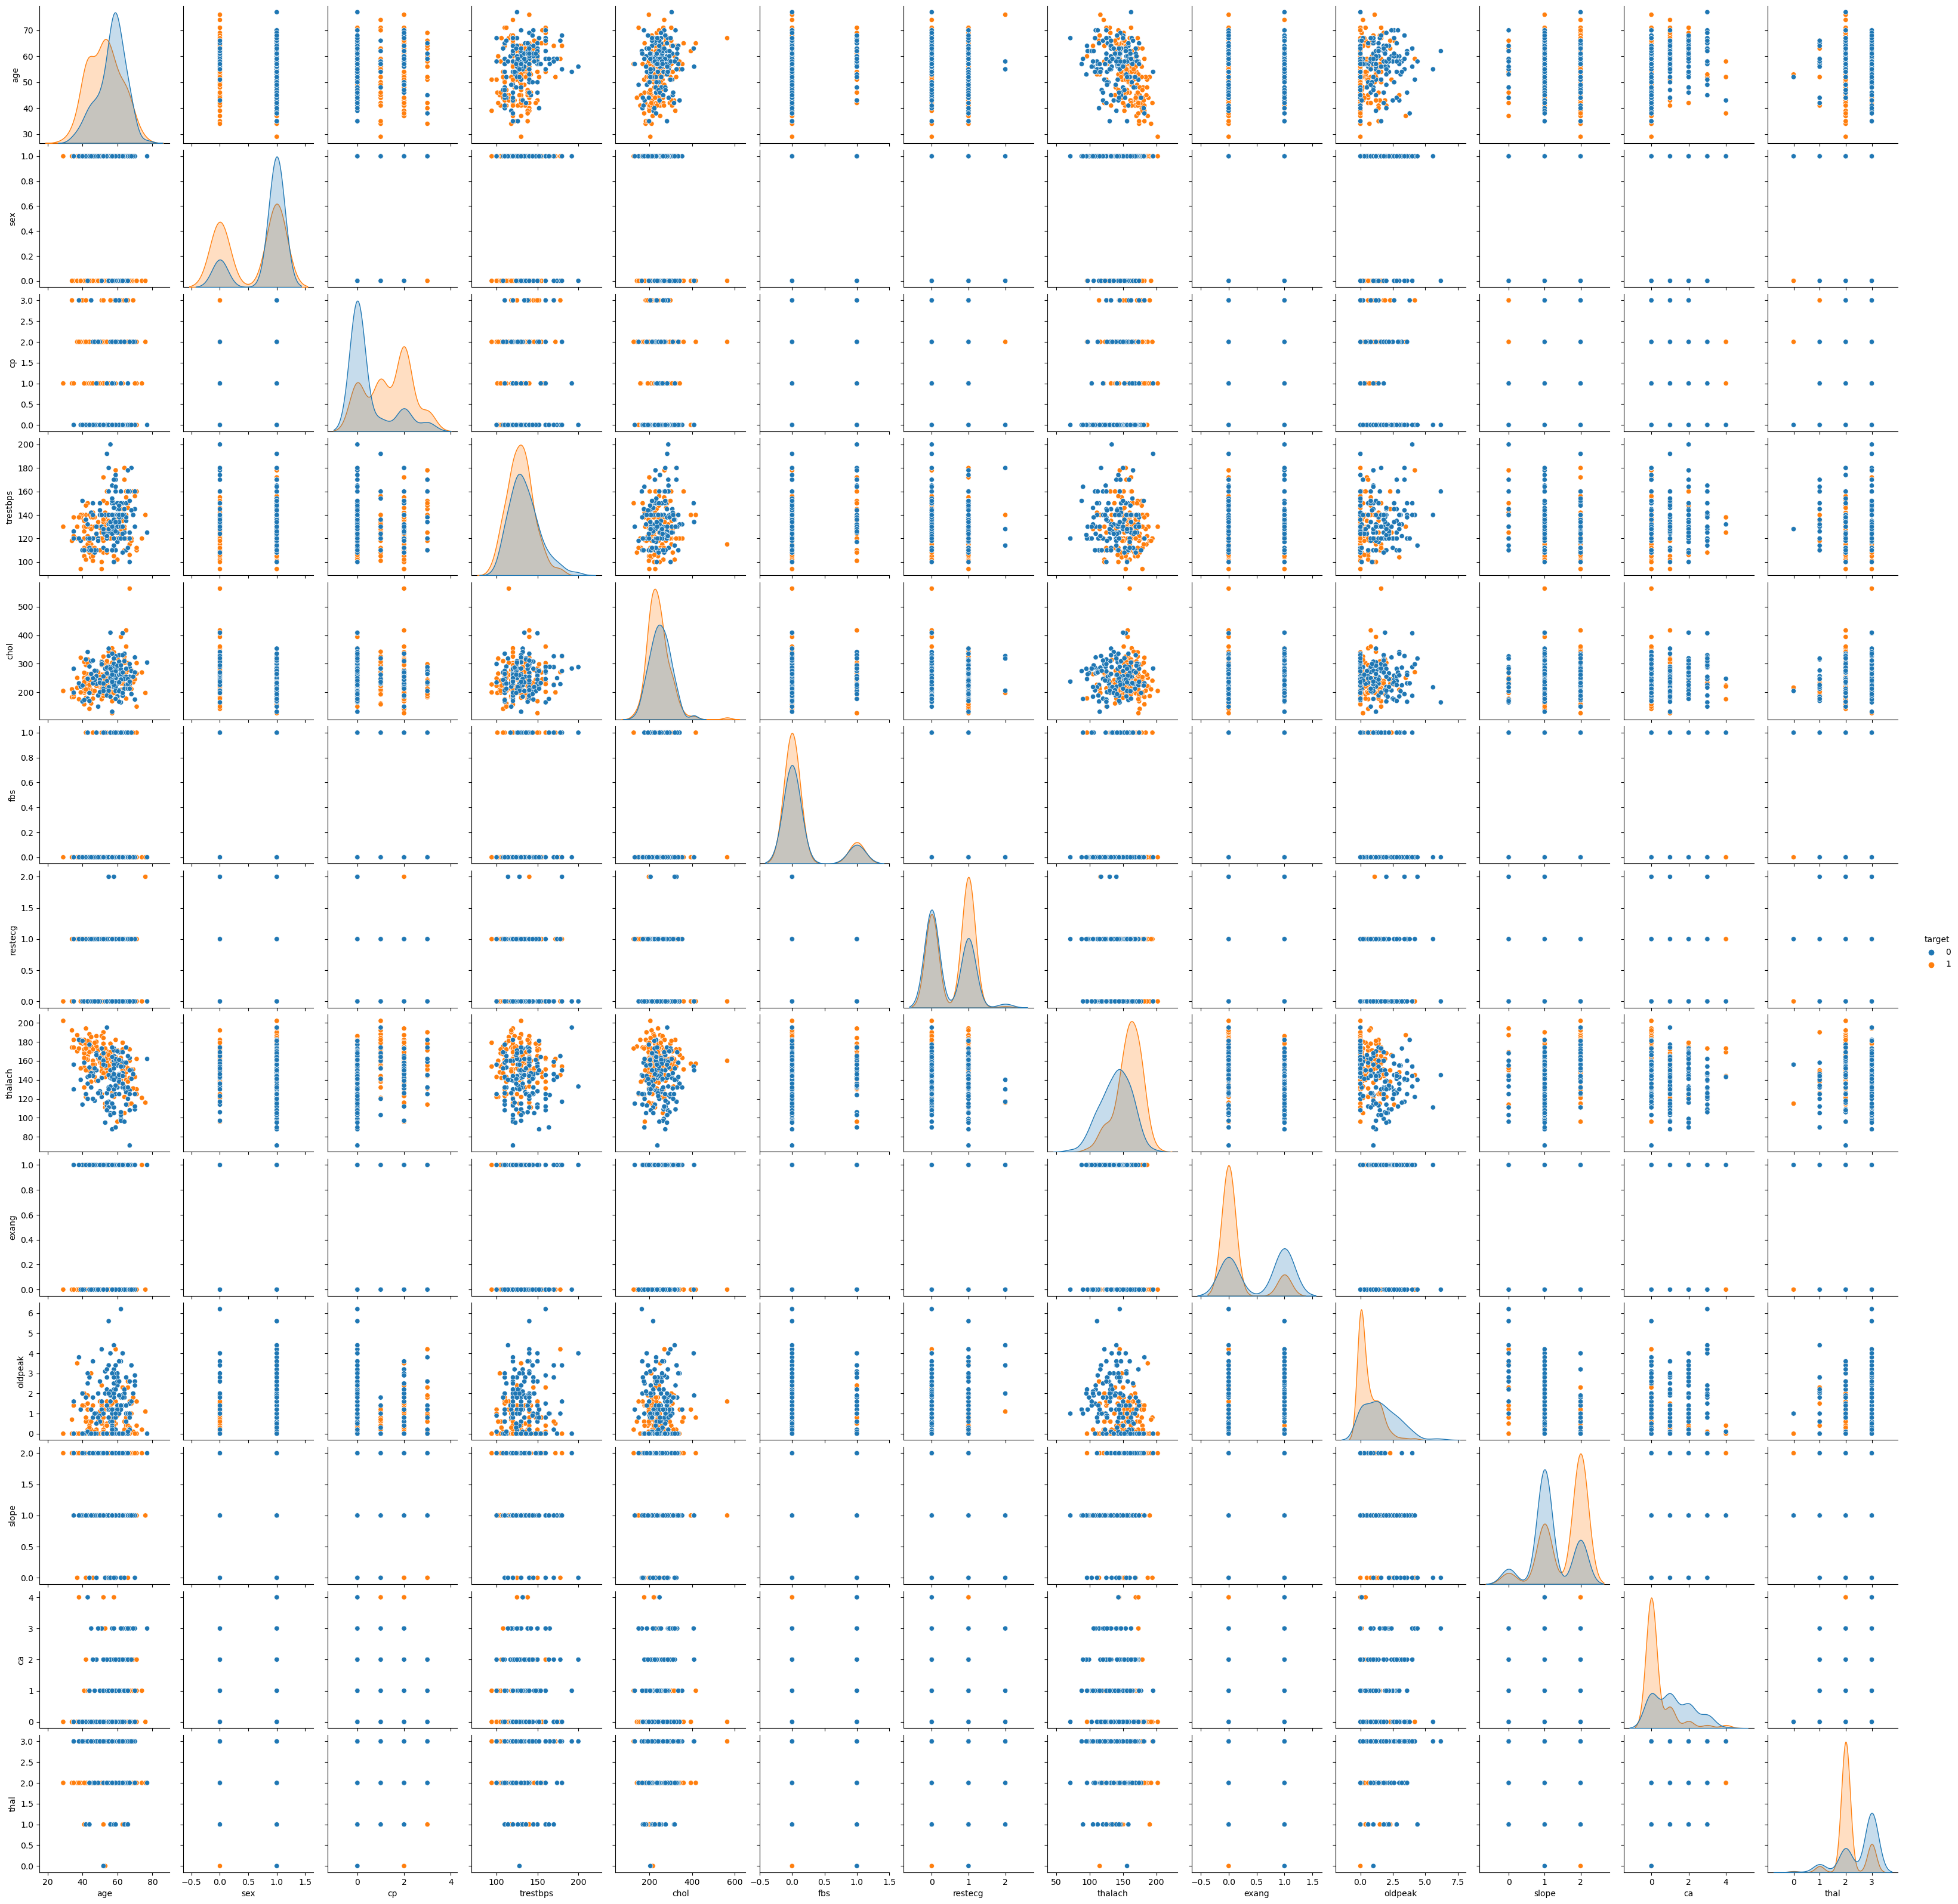

In [28]:
sns.pairplot(healthcare,hue="target");

### 3.	Build a baseline model to predict the risk of a heart attack using a logistic regression and random forest and explore the results while using correlation analysis and logistic regression (leveraging standard error and p-values from statsmodels) for feature selection

In [29]:
# Defining X and y variables for the model
X=healthcare.drop('target',axis=1)
y=healthcare['target']

In [30]:
X.shape,y.shape

((302, 13), (302,))

In [31]:
# Scaling the X variables data
scaler=StandardScaler()
X_scaled=pd.DataFrame(scaler.fit_transform(X),columns=X.columns)

In [32]:
X_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
age,302.0,-2.724090e-16,1.00166,-2.814192,-0.710788,0.119503,0.728383,2.499671
sex,302.0,-2.492487e-16,1.00166,-1.464866,-1.464866,0.682656,0.682656,0.682656
cp,302.0,-1.666943e-16,1.00166,-0.935208,-0.935208,0.035352,1.005911,1.976470
trestbps,302.0,-8.053712e-16,1.00166,-2.144521,-0.661712,-0.091401,0.478910,3.900776
chol,302.0,-2.086263e-17,1.00166,-2.332210,-0.687083,-0.116127,0.546763,6.145034
fbs,302.0,-3.529186e-17,1.00166,-0.418446,-0.418446,-0.418446,-0.418446,2.389793
restecg,302.0,8.455341e-17,1.00166,-1.002541,-1.002541,0.901657,0.901657,2.805854
thalach,302.0,-4.087974e-16,1.00166,-3.436149,-0.713716,0.128160,0.718568,2.292987
exang,302.0,-5.440828e-17,1.00166,-0.698344,-0.698344,-0.698344,1.431958,1.431958
oldpeak,302.0,-1.948405e-16,1.00166,-0.899544,-0.899544,-0.209608,0.480328,4.447460


In [33]:
train_X,test_X,train_Y,test_Y=train_test_split(X_scaled,y,test_size=0.3,random_state=200)

In [34]:
train_X.shape,test_X.shape,train_Y.shape,test_Y.shape

((211, 13), (91, 13), (211,), (91,))

#### Logistic Regression Model

In [35]:
log_reg=LogisticRegression()
log_reg.fit(train_X,train_Y)

LogisticRegression()

In [36]:
# Accuracy score for Train and test data
print('Train Score:{}'.format(log_reg.score(train_X,train_Y)))
print('Test Score:{}'.format(log_reg.score(test_X,test_Y)))

Train Score:0.8530805687203792
Test Score:0.8901098901098901


In [37]:
# Accuracy score for test data
##print('Train score:{}'.format(metrics.accuracy_score(train_Y,log_reg.predict(train_X))))
Logistic_reg_test_score = metrics.accuracy_score(test_Y,log_reg.predict(test_X))
Logistic_reg_test_score

0.8901098901098901

In [38]:
# Confusion matrix for train data
metrics.confusion_matrix(train_Y,log_reg.predict(train_X))

array([[ 72,  23],
       [  8, 108]], dtype=int64)

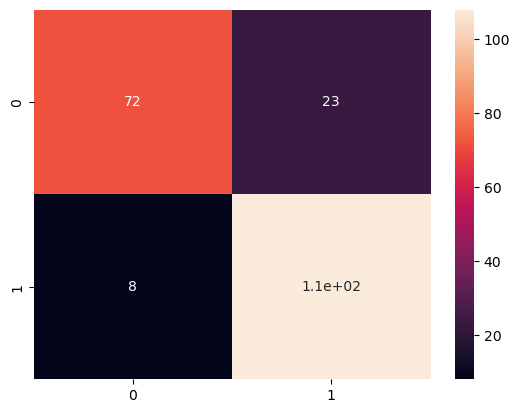

In [39]:
sns.heatmap(metrics.confusion_matrix(train_Y,log_reg.predict(train_X)),annot=True);

In [40]:
# Confusion matrix for test data
metrics.confusion_matrix(test_Y,log_reg.predict(test_X))

array([[37,  6],
       [ 4, 44]], dtype=int64)

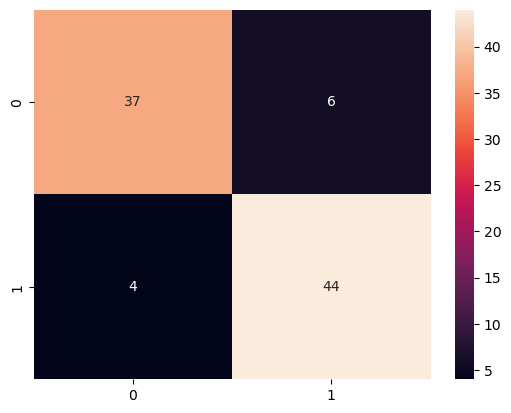

In [41]:
sns.heatmap(metrics.confusion_matrix(test_Y,log_reg.predict(test_X)),annot=True);

In [42]:
# Classification Report for Train Data
print(metrics.classification_report(train_Y,log_reg.predict(train_X)))

              precision    recall  f1-score   support

           0       0.90      0.76      0.82        95
           1       0.82      0.93      0.87       116

    accuracy                           0.85       211
   macro avg       0.86      0.84      0.85       211
weighted avg       0.86      0.85      0.85       211



In [43]:
# Classification Report for Test Data
print(metrics.classification_report(test_Y,log_reg.predict(test_X)))

              precision    recall  f1-score   support

           0       0.90      0.86      0.88        43
           1       0.88      0.92      0.90        48

    accuracy                           0.89        91
   macro avg       0.89      0.89      0.89        91
weighted avg       0.89      0.89      0.89        91



### Random Forest Classifier 

In [44]:
random_forest=RandomForestClassifier(max_depth=7,min_samples_leaf=7)
#random_forest=RandomForestClassifier(max_depth=5,min_samples_leaf=5)
#random_forest=RandomForestClassifier()
random_forest.fit(train_X,train_Y)

RandomForestClassifier(max_depth=7, min_samples_leaf=7)

In [45]:
# Accuracy score for Train and Test Data
print('Train Score:{}'.format(random_forest.score(train_X,train_Y)))
print('Test Score:{}'.format(random_forest.score(test_X,test_Y)))

Train Score:0.8909952606635071
Test Score:0.8571428571428571


In [46]:
# Accuracy score for Test Data
#print('Train score:{}'.format(metrics.accuracy_score(train_Y,random_forest.predict(train_X))))
Random_forest_test_score=metrics.accuracy_score(test_Y,random_forest.predict(test_X))
Random_forest_test_score

0.8571428571428571

In [47]:
# Confusion matrix for Train data
metrics.confusion_matrix(train_Y,random_forest.predict(train_X))

array([[ 77,  18],
       [  5, 111]], dtype=int64)

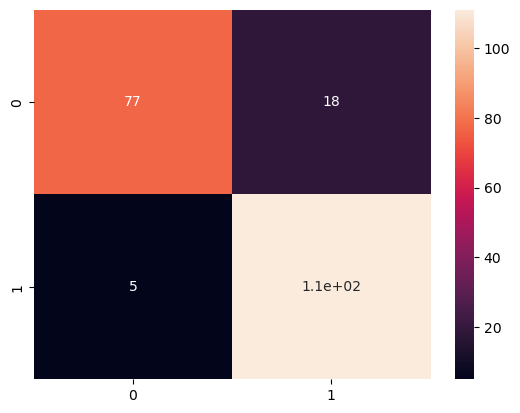

In [48]:
sns.heatmap(metrics.confusion_matrix(train_Y,random_forest.predict(train_X)),annot=True);

In [49]:
# Confusion matrix for Test data
metrics.confusion_matrix(test_Y,random_forest.predict(test_X))

array([[36,  7],
       [ 6, 42]], dtype=int64)

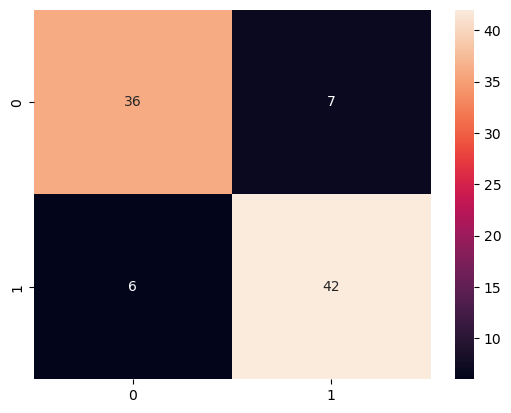

In [50]:
sns.heatmap(metrics.confusion_matrix(test_Y,random_forest.predict(test_X)),annot=True);

In [51]:
# Classification Report for Train Data
print(metrics.classification_report(train_Y,random_forest.predict(train_X)))

              precision    recall  f1-score   support

           0       0.94      0.81      0.87        95
           1       0.86      0.96      0.91       116

    accuracy                           0.89       211
   macro avg       0.90      0.88      0.89       211
weighted avg       0.90      0.89      0.89       211



In [52]:
# Classification Report for Test Data
print(metrics.classification_report(test_Y,random_forest.predict(test_X)))

              precision    recall  f1-score   support

           0       0.86      0.84      0.85        43
           1       0.86      0.88      0.87        48

    accuracy                           0.86        91
   macro avg       0.86      0.86      0.86        91
weighted avg       0.86      0.86      0.86        91



### Logistic regression using Stats model

In [53]:
import statsmodels.api as sm 

In [54]:
train_Y_1=np.array(train_Y)

In [55]:
Log_reg_sm= sm.Logit(train_Y.values,train_X).fit()

Optimization terminated successfully.
         Current function value: 0.359148
         Iterations 7


In [56]:
Log_reg_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  211
Model:                          Logit   Df Residuals:                      198
Method:                           MLE   Df Model:                           12
Date:                Tue, 06 Dec 2022   Pseudo R-squ.:                  0.4781
Time:                        23:06:06   Log-Likelihood:                -75.780
converged:                       True   LL-Null:                       -145.21
Covariance Type:            nonrobust   LLR p-value:                 1.020e-23
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
age            0.1166      0.248      0.470      0.638      -0.369       0.602
sex           -0.6397      0.242     -2.638      0.008      -1.115      -0.164
cp             0.8529      0.242      3.529      0.000       0.379       1.327
trestbps      -0.5406      0.216     -2.501      0.012      -0.964      -0.117
chol          -0.2159      0.227     -0.953      0.341      -0.660       0.228
fbs            0.1245      0.224      0.555      0.579      -0.315       0.564
restecg        0.3307      0.220      1.501      0.133      -0.101       0.763
thalach        0.4072      0.280      1.454      0.146      -0.142       0.956
exang         -0.2798      0.233     -1.201      0.230      -0.736       0.177
oldpeak       -0.7826      0.304     -2.578      0.010      -1.378      -0.188
slope          0.3360      0.255      1.317      0.188      -0.164       0.836
ca            -0.9001      0.248     -3.628      0.000      -1.386      -0.414
thal          -0.6481      0.224     -2.896      0.004      -1.087      -0.209
==============================================================================
"""

In [57]:
Y_pred=Log_reg_sm.predict(test_X)
YPrediction=list(map(round,Y_pred))

In [58]:
metrics.confusion_matrix(test_Y,YPrediction)

array([[37,  6],
       [ 6, 42]], dtype=int64)

In [59]:
# Accuracy Score for the Test data
#print('Test score:{}'.format(metrics.accuracy_score(test_Y,YPrediction)))
logistic_reg_stats_test_score=metrics.accuracy_score(test_Y,YPrediction)
logistic_reg_stats_test_score

0.8681318681318682

In [60]:
# Confusion matrix for Test data
metrics.confusion_matrix(test_Y,YPrediction)

array([[37,  6],
       [ 6, 42]], dtype=int64)

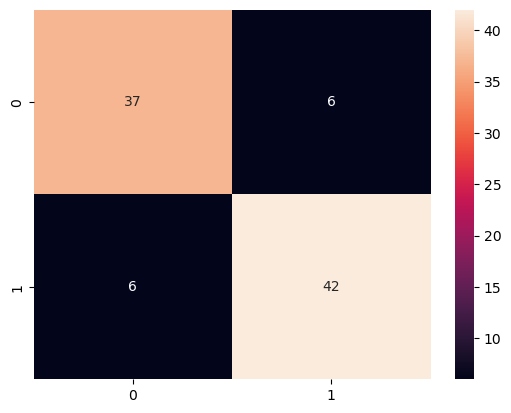

In [61]:
sns.heatmap(metrics.confusion_matrix(test_Y,YPrediction),annot=True);

In [62]:
# Classification Report for Test Data
print(metrics.classification_report(test_Y,YPrediction))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86        43
           1       0.88      0.88      0.88        48

    accuracy                           0.87        91
   macro avg       0.87      0.87      0.87        91
weighted avg       0.87      0.87      0.87        91



#### Feature Selection based on Correlation

In [63]:
# Correlation of independent variables
corr_ind_var=train_X.corr()
corr_ind_var

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
age,1.000000,-0.088888,-0.079607,0.299860,0.217779,0.169457,-0.108391,-0.382699,0.108494,0.190188,-0.158363,0.331479,0.061831
sex,-0.088888,1.000000,-0.062774,-0.040646,-0.189423,0.053978,-0.136695,-0.084951,0.182232,0.182580,-0.077929,0.138717,0.252357
cp,-0.079607,-0.062774,1.000000,0.034001,-0.052710,0.116436,0.057402,0.316480,-0.422369,-0.156448,0.093695,-0.229376,-0.171442
trestbps,0.299860,-0.040646,0.034001,1.000000,0.150089,0.175946,-0.145760,-0.021759,0.094766,0.157824,-0.117523,0.080567,0.123491
chol,0.217779,-0.189423,-0.052710,0.150089,1.000000,0.086540,-0.139000,0.045140,0.028881,0.007579,-0.000111,0.089466,0.060424
fbs,0.169457,0.053978,0.116436,0.175946,0.086540,1.000000,-0.059884,-0.007209,-0.002879,0.040375,-0.058079,0.169910,0.026549
restecg,-0.108391,-0.136695,0.057402,-0.145760,-0.139000,-0.059884,1.000000,0.070325,-0.082340,-0.074029,0.075366,-0.028335,-0.035332
thalach,-0.382699,-0.084951,0.316480,-0.021759,0.045140,-0.007209,0.070325,1.000000,-0.356470,-0.336265,0.395393,-0.203949,-0.108303
exang,0.108494,0.182232,-0.422369,0.094766,0.028881,-0.002879,-0.082340,-0.356470,1.000000,0.297818,-0.203783,0.105776,0.266513
oldpeak,0.190188,0.182580,-0.156448,0.157824,0.007579,0.040375,-0.074029,-0.336265,0.297818,1.000000,-0.578136,0.238262,0.206469


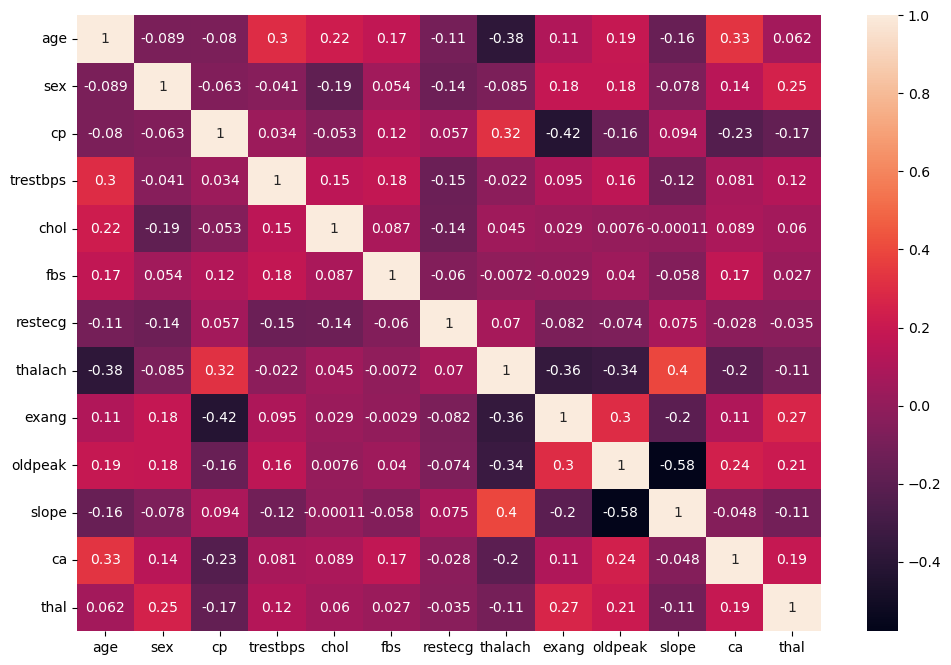

In [64]:
plt.figure(figsize=(12,8))
sns.heatmap(corr_ind_var,annot=True);

In [65]:
# with the following function we can select highly correlated feature
# it will remove the first feature that is correlated with anything other feature
def correlation(data,threshold):
    col_corr=list()
    corr_matrix=data.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) >threshold:
                col_name = corr_matrix.columns[i]
                col_corr.append(col_name)
                
    return col_corr
                
                
    

In [66]:
corr_features= correlation(train_X,0.9)

In [67]:
corr_features

[]

*With Correlation method, there are none of the features having a correlation greater than 0.9*

***Hence cannot drop any features based on correlation***

#### Feature selection based on p value

In [68]:
# P values are assigned to a variable
P_values=round(Log_reg_sm.pvalues,3)

In [69]:
P_values

age         0.638
sex         0.008
cp          0.000
trestbps    0.012
chol        0.341
fbs         0.579
restecg     0.133
thalach     0.146
exang       0.230
oldpeak     0.010
slope       0.188
ca          0.000
thal        0.004
dtype: float64

In [70]:
# features are selected where P value >=0.01
Features=P_values[P_values>=0.01]
features_col=list(Features.index)

In [71]:
Features

age         0.638
trestbps    0.012
chol        0.341
fbs         0.579
restecg     0.133
thalach     0.146
exang       0.230
oldpeak     0.010
slope       0.188
dtype: float64

In [72]:
# selected the columns P values >=0.01 in train and test data
train_X_featured=train_X[features_col]
test_X_featured=test_X[features_col]

In [73]:
# checked the shape of train and test data
train_X_featured.shape,test_X_featured.shape,train_Y.shape,test_Y.shape

((211, 9), (91, 9), (211,), (91,))

In [78]:
# fitting the logistic regression model
Log_reg_sm= sm.Logit(train_Y.values,train_X_featured).fit()

Optimization terminated successfully.
         Current function value: 0.504609
         Iterations 6


In [79]:
Y_pred_featured=Log_reg_sm.predict(test_X_featured)
YPrediction_featured=list(map(round,Y_pred_featured))

In [80]:
# Test Accuracy score after feature selection
#print('Test score:{}'.format(metrics.accuracy_score(test_Y,YPrediction_featured)))
Logistic_reg_feature_score=metrics.accuracy_score(test_Y,YPrediction_featured)
Logistic_reg_feature_score

0.8131868131868132

In [81]:
# Confusion matirx for the test data after feature engineering
metrics.confusion_matrix(test_Y,YPrediction_featured)

array([[34,  9],
       [ 8, 40]], dtype=int64)

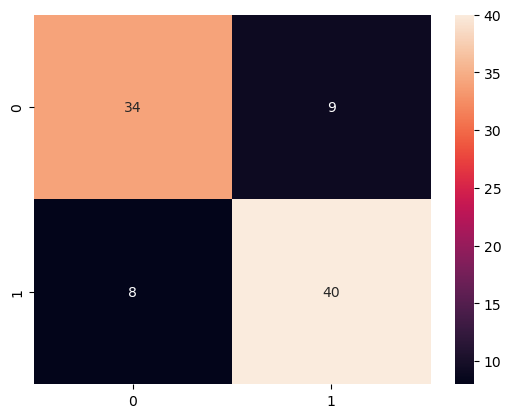

In [82]:
sns.heatmap(metrics.confusion_matrix(test_Y,YPrediction_featured),annot=True);

In [83]:
print(metrics.classification_report(test_Y,YPrediction_featured))

              precision    recall  f1-score   support

           0       0.81      0.79      0.80        43
           1       0.82      0.83      0.82        48

    accuracy                           0.81        91
   macro avg       0.81      0.81      0.81        91
weighted avg       0.81      0.81      0.81        91



### Scores of all the models

In [84]:
# Test Accuracy Score for the models built
print("Test Accuracy score for Logistic regression model built using sklearn :{}".format(Logistic_reg_test_score))
print("Test Accuracy score for Random forest classification model built using sklearn :{}".format(Random_forest_test_score))
print("Test Accuracy score for Logistic regression model built using stats model :{}".format(logistic_reg_stats_test_score))
print("Test Accuracy score after feature selection using p-value>=0.01,Logistic regression model built using stats model :{}".format(Logistic_reg_feature_score))

Test Accuracy score for Logistic regression model built using sklearn :0.8901098901098901
Test Accuracy score for Random forest classification model built using sklearn :0.8571428571428571
Test Accuracy score for Logistic regression model built using stats model :0.8681318681318682
Test Accuracy score after feature selection using p-value>=0.01,Logistic regression model built using stats model :0.8131868131868132


***Comparing the Test accuracy score for all the built models, logistic regression model using Sklearn provides better accuracy***